# Classificação com TensorFlow

Vamos projetar e treiinar uma rede neural feed-forward simples para classificar imagens em 1 de 10 rótulos. 
Usaremos keras, uma biblioteca de aprendizado profundo de alto nível, para definir e treinar nosso modelo. O Keras faz parte da biblioteca tensorflow, portanto, 
a instalação separada não é necessária.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Usaremos o conjunto de dados FashionMNIST publicado pela Zalando Research, que é um pouco mais difícil do que o conjunto de dados escrito à mão do MNIST. 
Este conjunto de dados contém imagens de itens de vestuário, como calças, casacos, bolsas etc. O conjunto de dados consiste em 60.000 imagens de treinamento e 10.000 imagens 
de teste. Cada imagem é uma imagem em escala de cinza com tamanho 28x28 pixels. Existem 10 categorias no total e a cada rótulo é atribuído um número entre 0 e 9. 
Os rótulos de classe correspondentes podem ser encontrados https://github.com/zalandoresearch/fashion-mnist#labels

O Keras já vem com o conjunto de dados FashionMNIST e fará o download se ele ainda não existir em sua máquina. Vamos carregar o conjunto de dados e explorá-lo um pouco.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_treino, y_treino), (x_teste, y_teste) = fashion_mnist.load_data()

# Vamos verificar quantas amostras existem no conjunto de treinamento e teste, seu tamanho e também as categorias.
print("\n")
print("Shape dos dados de treino (X): ", x_treino.shape)
print("Shape dos dados de treino (Y): ", np.unique(y_treino))
print("Shape dos dados de teste (X):  ", x_teste.shape)
print("\n")



Shape dos dados de treino (X):  (60000, 28, 28)
Shape dos dados de treino (Y):  [0 1 2 3 4 5 6 7 8 9]
Shape dos dados de teste (X):   (10000, 28, 28)




In [3]:
# Agora vamos definir as classes (labels ou etiquetas)
class_names = {i:cn for i, cn in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }

In [4]:
# Função para o plot das imagens
def plot(images, labels, predictions = None):

    # Cria um grid de 5 colunas
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (n_cols + 3, n_rows + 4))
    
    # Checa se tem previsões para imprimir no Plot
    if predictions is None:
        predictions = [None] * len(labels)
        
    # Loop pelos dados para impressão no Plot
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap = plt.cm.binary)
        
        # Imprime o valor real (y)
        ax.set_title(f"L: {class_names[y_true]}")
        
        # Imprimie a previsão do modelo (y_pred)
        if y_pred is not None:
            ax.set_xlabel(f"Prev: {class_names[y_pred]}")
    
        ax.set_xticks([])
        ax.set_yticks([])


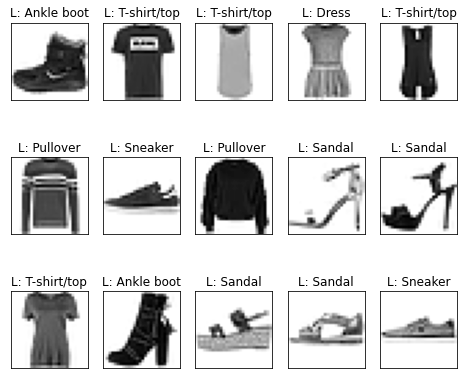

In [5]:
# Plot de algumas imagens
plot(x_treino[:15], y_treino[:15])   
plt.show()

In [6]:
# Dimensiona os valores entre 0 e 1 para o conjunto de treinamento e teste
x_treino = x_treino / 255.0
x_teste = x_teste / 255.0

In [7]:
# Cria o modelo
modelo = keras.Sequential(layers = [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [8]:
# Compila o modelo
modelo.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [9]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Treina o modelo
modelo.fit(x_treino, y_treino, batch_size = 100, epochs = 20, validation_split = 0.2)

Epoch 1/20
480/480 [==============================] - 1s 2ms/step - loss: 0.5645 - accuracy: 0.8060 - val_loss: 0.4366 - val_accuracy: 0.8493
Epoch 2/20
480/480 [==============================] - 1s 1ms/step - loss: 0.4102 - accuracy: 0.8568 - val_loss: 0.3938 - val_accuracy: 0.8606
Epoch 3/20
480/480 [==============================] - 1s 1ms/step - loss: 0.3703 - accuracy: 0.8682 - val_loss: 0.3739 - val_accuracy: 0.8694
Epoch 4/20
480/480 [==============================] - 1s 1ms/step - loss: 0.3412 - accuracy: 0.8768 - val_loss: 0.3648 - val_accuracy: 0.8687
Epoch 5/20
480/480 [==============================] - 1s 1ms/step - loss: 0.3275 - accuracy: 0.8813 - val_loss: 0.3545 - val_accuracy: 0.8727
Epoch 6/20
480/480 [==============================] - 1s 1ms/step - loss: 0.3057 - accuracy: 0.8883 - val_loss: 0.3329 - val_accuracy: 0.8805
Epoch 7/20
480/480 [==============================] - 1s 1ms/step - loss: 0.2912 - accuracy: 0.8956 - val_loss: 0.3304 - val_accuracy: 0.8814
Epoch 

In [11]:
# Avalia o modelo com dados de teste
loss, accuracy = modelo.evaluate(x_teste, y_teste)
print(f"Acurácia = {accuracy*100:.2f} %")

313/313 [==============================] - 0s 991us/step - loss: 0.3518 - accuracy: 0.8819
Acurácia = 88.19 %


In [12]:
# Previsões com o modelo
print(modelo.predict_classes(x_teste))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[9 2 1 ... 8 1 5]


In [13]:
# Grava as previsões
preds = modelo.predict_classes(x_teste)

# Obtém algumas imagens randomicamente
rand_idxs = np.random.permutation(len(x_teste))[:20]

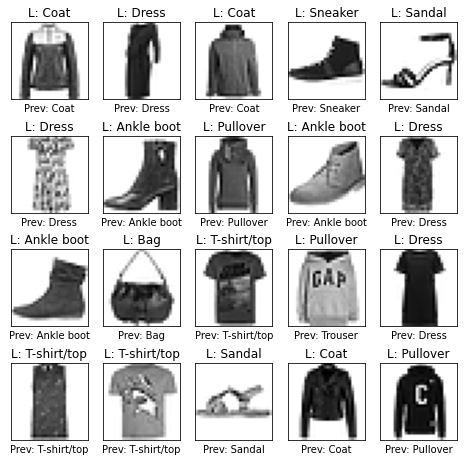

In [14]:
# Plot das previaões
plot(x_teste[rand_idxs], y_teste[rand_idxs], preds[rand_idxs])
plt.show()